In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
traindata = np.loadtxt('train_in.csv', delimiter=',')
trainlabels = np.genfromtxt('train_out.csv', delimiter=',', dtype=int)

testdata = np.genfromtxt('test_in.csv', delimiter=',')
testlabels = np.genfromtxt('test_out.csv', delimiter=',', dtype=int)

In [17]:
class DigitPerceptron:
    def __init__(self, 
                 traindata, trainlabels, 
                 testdata, testlabels, 
                 random_seed: int = 11,
                 learning_rate: float = .1,
                 ):
        
        self.traindata = traindata
        self.trainlabels = trainlabels
        self.testdata = testdata
        self.testlabels = testlabels
        self.learning_rate = learning_rate

        self.trainmatrix = np.c_[np.ones((len(self.traindata), 1)), self.traindata]
        self.testmatrix = np.c_[np.ones((len(self.testdata), 1)), self.testdata]

        np.random.seed(random_seed)
        self.weights = np.random.random(size=(257,10))

    @property
    def output(self) -> np.array:
        return self.trainmatrix @ self.weights

    @property
    def guesses(self) -> np.array:
        return np.argmax(self.output, axis=1)
    
    @property
    def fraction_correct(self):
        return np.sum(self.guesses == self.trainlabels)/len(self.trainlabels)
    
    @property
    def test_guesses(self):
        test_output = self.testmatrix @ self.weights
        return np.argmax(test_output, axis=1)

    @property
    def test_score(self):
        return np.sum(self.test_guesses == self.testlabels)/len(self.testlabels)
    
    def plot_test_confusion(self):
        confusion = confusion_matrix(self.testlabels, self.test_guesses)
        ConfusionMatrixDisplay(confusion).plot()
        plt.title("Perceptron Confusion (test set)")
        plt.savefig("reportfigs/perceptron_confusion.pdf")
        

    def update_weights(self):
        """Updates the weights once"""
        if np.allclose(self.guesses, self.trainlabels):
            return True

        # pick a misclassified image
        misclassified_image = np.argwhere(self.guesses != self.trainlabels)[0]
        
        # just a little bookkeeping for the next step
        node_activations = self.output[misclassified_image][0]
        correct_digit = self.trainlabels[misclassified_image]
        c_i_activation = node_activations[correct_digit]

        # select which direction to adjust the weights in for each node
        ds = np.zeros((10))
        too_high_nodes = node_activations > c_i_activation
        ds[too_high_nodes] = -1
        ds[correct_digit] = 1

        # apply the weight adjustments
        for digit, d in enumerate(ds):          
            self.weights[:, digit] += d * self.learning_rate * self.trainmatrix[misclassified_image][0]

    def train(self, max_epochs=np.inf):
        """Repeatedly updates the weights until convergence on the training set."""
        epoch = 0
        while not self.update_weights() and epoch < max_epochs:
            print(f"epoch {epoch}: train accuracy {self.fraction_correct:.2%}", end='\r')
            epoch += 1
        print()

        print(f"Test set accuracy: {self.test_score:.2%}")


epoch 2059: train accuracy 100.00%
Test set accuracy: 87.80%
epoch 2108: train accuracy 100.00%
Test set accuracy: 87.90%
epoch 2116: train accuracy 100.00%
Test set accuracy: 88.20%


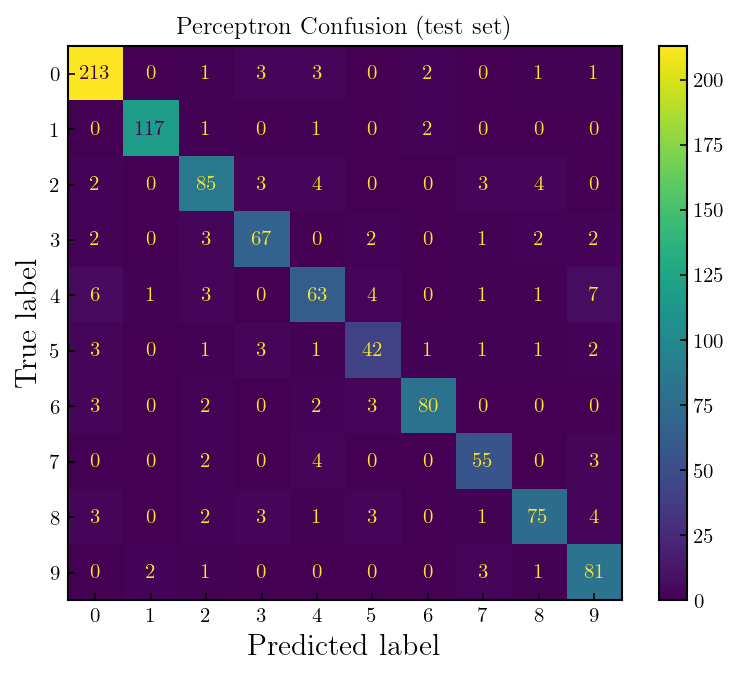

In [18]:
perceptron1 = DigitPerceptron(traindata = traindata, 
                        trainlabels = trainlabels,
                        testdata = testdata,
                        testlabels = testlabels, 
                        random_seed = 1,
                        )

perceptron1.train()
perceptron1.plot_test_confusion()

perceptron2 = DigitPerceptron(traindata = traindata, 
                        trainlabels = trainlabels,
                        testdata = testdata,
                        testlabels = testlabels, 
                        random_seed = 2,
                        )
perceptron2.train()

perceptron3 = DigitPerceptron(traindata = traindata, 
                        trainlabels = trainlabels,
                        testdata = testdata,
                        testlabels = testlabels, 
                        random_seed = 3,
                        )
perceptron3.train()

In [25]:
confusion = confusion_matrix(np.c_[perceptron1.testlabels, perceptron2.testlabels], np.c_[perceptron1.test_guesses, perceptron2.test_guesses])
ConfusionMatrixDisplay(confusion).plot()
plt.title("Combined perceptrons")
# plt.savefig("reportfigs/perceptron_confusion.pdf")

ValueError: multiclass-multioutput is not supported